In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./data/giantsGates/{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    ranks = ranks[ranks['creatorName'].str.contains('GG')]
    if print_info:
        ranks.info()
    return ranks


In [178]:
NAMES = ['MUN', 'THR', 'OGR', 'SHM', 'BRW', 'WRL']

def collect_scores(ranks):
    by_units = []
    for name in NAMES:
        units = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
        units.reset_index(drop=True, inplace=True)
        by_units.append(units)

    unit_scores = pd.concat(by_units,
        ignore_index=True, axis=1)
    unit_scores.columns = NAMES
    return unit_scores

def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(unit_scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=unit_scores)

NAME -- MEAN   --   MED
WRL -- 2494.59 -- 2480.29
SHM -- 1364.82 -- 1203.23
THR -- 793.56  -- 789.42
BRW -- 567.39  -- 620.46
MUN -- 374.26  -- 516.49
OGR -- 10.07   -- -37.20


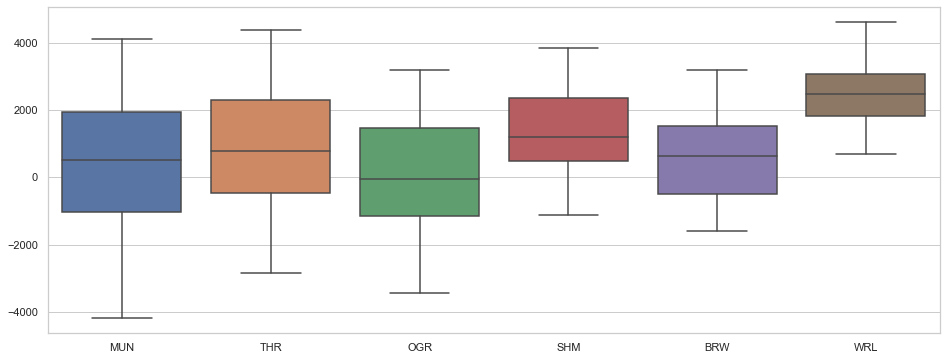

In [179]:
# Version 0.8.23
# team by 3
# C point without assault
front_team3_v0 = take_and_clean('rankingsC', '-C-', False)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 56 to 273
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
WRL -- 2167.11 -- 2182.07
SHM -- 1300.05 -- 1322.52
BRW -- 1281.19 -- 1365.39
THR -- 796.32  -- 1159.64
OGR -- 608.93  -- 1174.93
MUN -- 228.45  -- 777.71


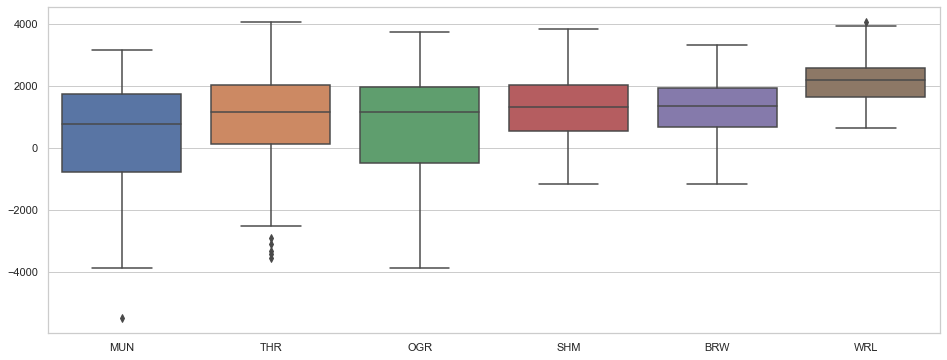

In [180]:
# Version 0.8.23.a
# team by 3
# ALT point with assault
front_team3_v0 = take_and_clean('rankingsV23A', 'V23A', True)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 53 to 303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
SHM -- 1758.37 -- 1779.49
BRW -- 1301.92 -- 1360.07
WRL -- 1295.20 -- 1277.73
OGR -- 1242.67 -- 1354.67
THR -- 1219.35 -- 1448.76
MUN -- 1050.17 -- 1239.13


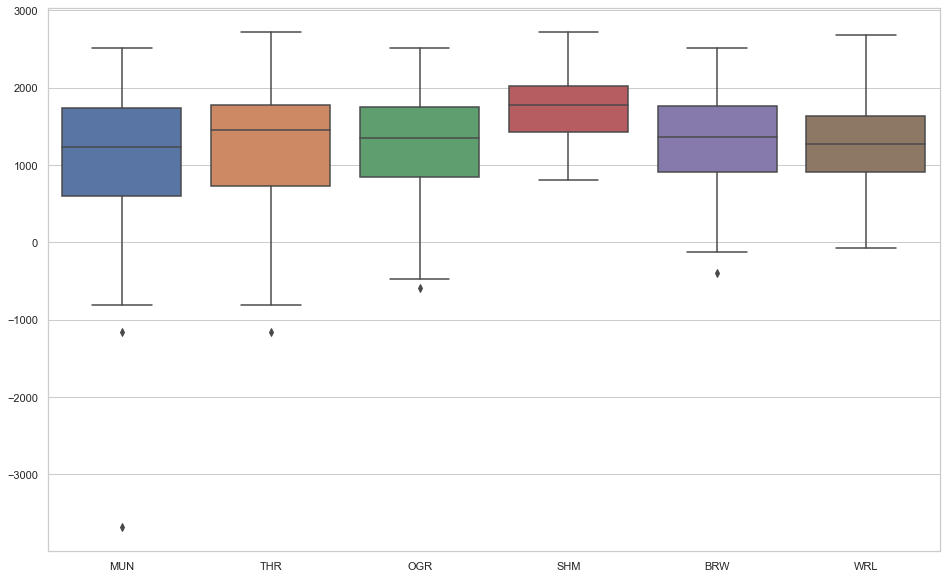

In [181]:
# Version 0.8.23.h
# team by 3
# ALT point with assault
# shaman maxHealth: 100 -> 105
front_team = take_and_clean('rankings23H3', '23H3', True)
front_team_scores = collect_scores(front_team)
print_score_data(front_team_scores)
boxplot_score(front_team_scores, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  1296 non-null   object 
 1   totalScore   1296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB
NAME -- MEAN   --   MED
SHM -- 2332.64 -- 2355.93
OGR -- 2223.62 -- 2260.25
THR -- 2217.23 -- 2268.75
WRL -- 2216.58 -- 2230.28
BRW -- 2144.06 -- 2206.29
MUN -- 2115.64 -- 2171.93


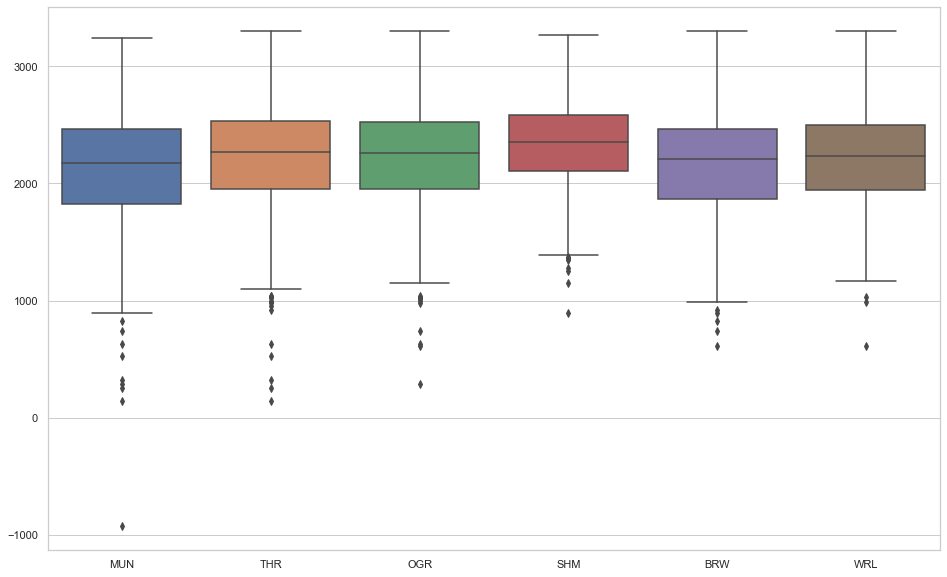

In [182]:
# Version 0.8.23.j
# team by 4
# ALT point with assault
# shaman maxHealth: 100 -> 105
front_team = take_and_clean('rankings23J4', '23J4', True)
front_team_scores = collect_scores(front_team)
print_score_data(front_team_scores)
boxplot_score(front_team_scores, 10)

In [183]:
def collect_pairs_scores(ranks):
    columns = []
    result = []
    for i, n1 in enumerate(NAMES):
        for n2 in NAMES[i+1:]:
            columns.append(f'{n1}-{n2}')
            pairs = ranks[(ranks['creatorName'].str.contains(n1)) 
                  & (ranks['creatorName'].str.contains(n2))]['totalScore'] * 100
            pairs.reset_index(drop=True, inplace=True)
            result.append(pairs)

    result_df = pd.concat(result,
        ignore_index=True, axis=1)
    result_df.columns = columns
    return result_df


NAME -- MEAN   --   MED
THR-SHM -- 2399.89 -- 2424.95
OGR-SHM -- 2377.88 -- 2379.55
SHM-WRL -- 2323.73 -- 2332.62
THR-WRL -- 2309.96 -- 2327.44
MUN-SHM -- 2301.41 -- 2328.38
OGR-WRL -- 2275.03 -- 2285.00
THR-OGR -- 2239.98 -- 2275.03
SHM-BRW -- 2230.64 -- 2258.88
OGR-BRW -- 2207.42 -- 2248.39
MUN-WRL -- 2172.09 -- 2177.47
THR-BRW -- 2169.69 -- 2228.99
MUN-OGR -- 2132.00 -- 2164.65
BRW-WRL -- 2104.90 -- 2095.93
MUN-THR -- 2098.01 -- 2160.86
MUN-BRW -- 2093.91 -- 2159.17


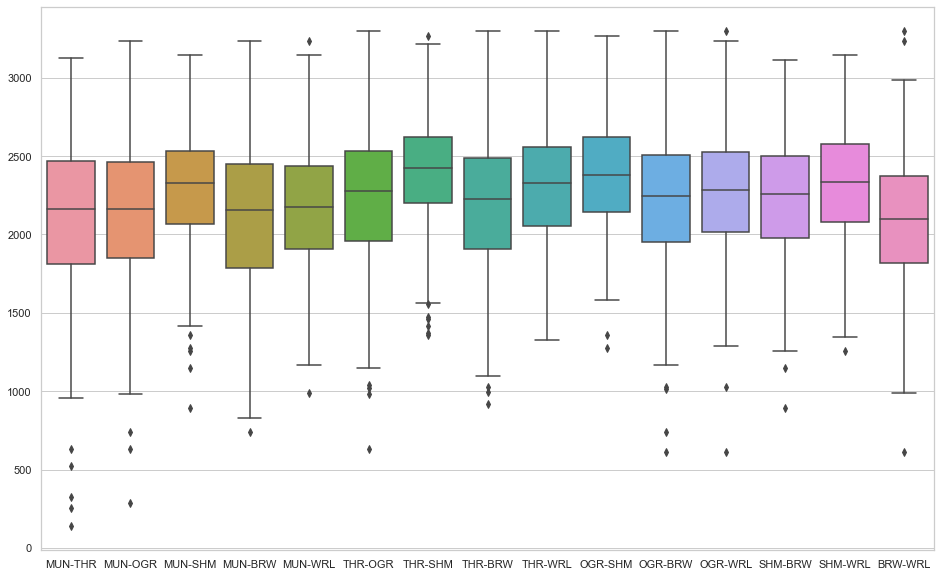

In [184]:
ladder_result = take_and_clean('rankings23J4', '23J4')
pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 10)
# pairs_scores

NAME -- MEAN   --   MED
SHM -- 1995.66 -- 2020.53
WRL -- 1911.97 -- 1934.30
THR -- 1902.77 -- 1985.94
OGR -- 1902.76 -- 1960.97
BRW -- 1900.62 -- 1975.67
MUN -- 1774.44 -- 1864.58
NAME -- MEAN   --   MED
THR-SHM -- 2070.91 -- 2073.13
THR-WRL -- 2038.41 -- 2055.10
OGR-SHM -- 2033.53 -- 2043.02
SHM-WRL -- 1981.64 -- 2009.04
OGR-BRW -- 1975.64 -- 2040.77
OGR-WRL -- 1972.56 -- 2018.78
SHM-BRW -- 1964.96 -- 2005.07
THR-BRW -- 1948.98 -- 2033.79
MUN-SHM -- 1936.53 -- 1971.85
THR-OGR -- 1911.99 -- 1989.84
MUN-WRL -- 1860.21 -- 1870.32
MUN-BRW -- 1846.14 -- 1944.46
BRW-WRL -- 1828.29 -- 1885.52
MUN-OGR -- 1793.53 -- 1865.19
MUN-THR -- 1743.38 -- 1802.57


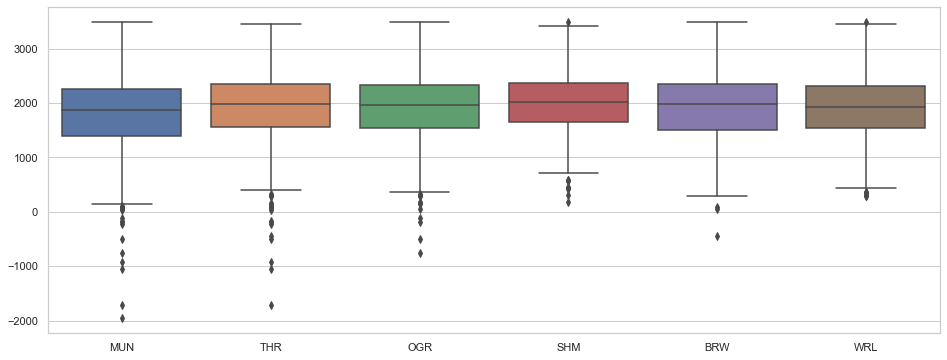

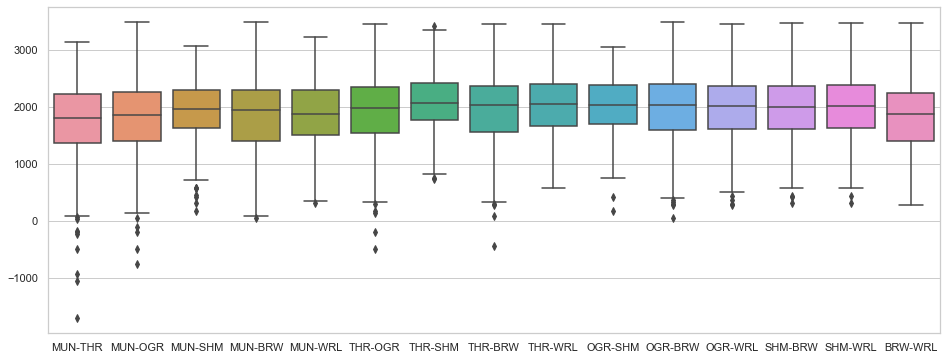

In [189]:
# Version 0.8.24.б
# team by 4
# ALT point with assault
# brawler
# attackDamage 50 => 52
# shaman
# attackDamage 23 => 22
ladder_result = take_and_clean('rankings24B4', '24B4')
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)
